# From simple distributions to dimensionality reduction.

importing libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('telecom_churn.csv')

In [3]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [4]:
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The last column (churns), is our target variable.  **True** indicates that the company eventually lost this customer, **False** indicates that the customer was retained. 

### Univariate visualization###

We analyse one feature at the time and ignore the other features in the dataset.

Quantitative features takes numerical values. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28d427f3c8>,
      dtype=object)

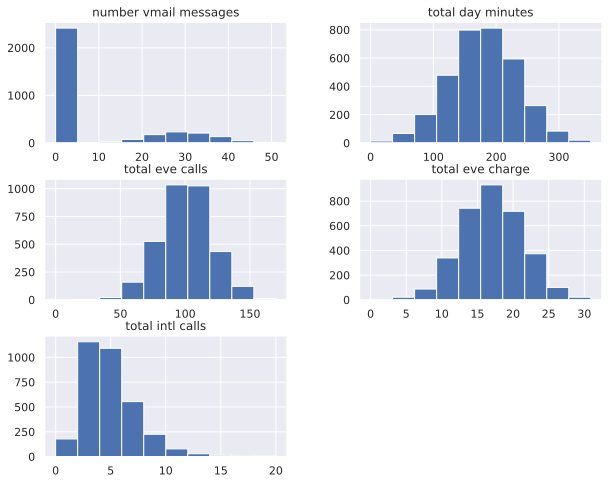

In [5]:
features = ['total day minutes', 'total intl calls', 'number vmail messages', 'total eve calls', 'total eve charge']
df[features].hist(figsize=(10, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28d1e61908>,
      dtype=object)

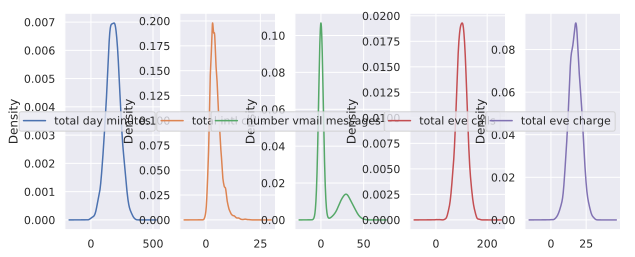

In [6]:
df[features].plot(kind='density', subplots=True, layout=(1, 5), sharex = False, figsize=(10, 4))

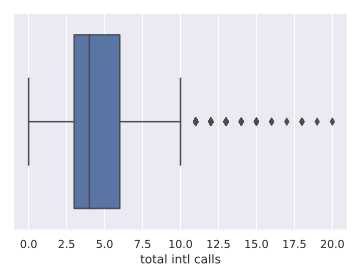

In [7]:
sns.boxplot(x='total intl calls', data=df);

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25th(Q1) and 75th(Q3) percentiles. The vertical line inside the box marks the median (50%) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval (Q1−1.5⋅IQR,Q3+1.5⋅IQR)
, where IQR=Q3−Q1

is the interquartile range.

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

### Categorical var

Important to notice here: this is called frequency table. And it is made for the predicting value_.

In [8]:
print(df['churn'].value_counts())
print()
print("Showing an unbalenced dataset")

False    2850
True      483
Name: churn, dtype: int64

Showing an unbalenced dataset


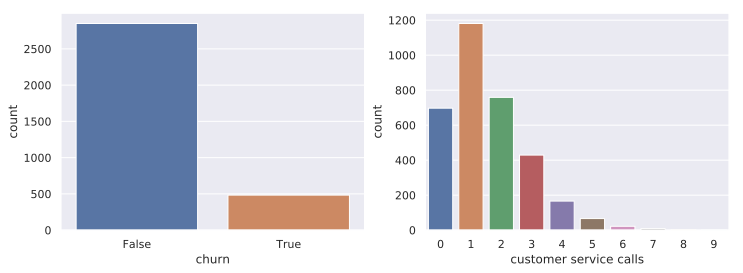

In [9]:
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

sns.countplot(x = 'churn', data=df, ax = axes[0])
sns.countplot(x = 'customer service calls', data=df, ax = axes[1])

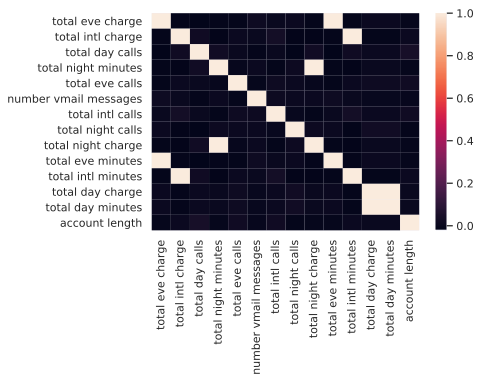

In [10]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['state', 'international plan', 'voice mail plan', 
                      'area code', 'churn', 'customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);



Total day charge that have been calculated directly from the number of 
minutes spent on phone calls (Total day minutes). These are called 
dependent variables and can therefore be left out since they do not contribute
any additional information. Let's get rid of them:

In [11]:
numerical = list(set(numerical) - 
                 set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))

Scatterplot matrix

In [12]:
print("Diagonal contains the distributions of the corresponding variables, \n and the scatter plots for each pair of variables fill the rest of the matrix.")

Diagonal contains the distributions of the corresponding variables, 
 and the scatter plots for each pair of variables fill the rest of the matrix.


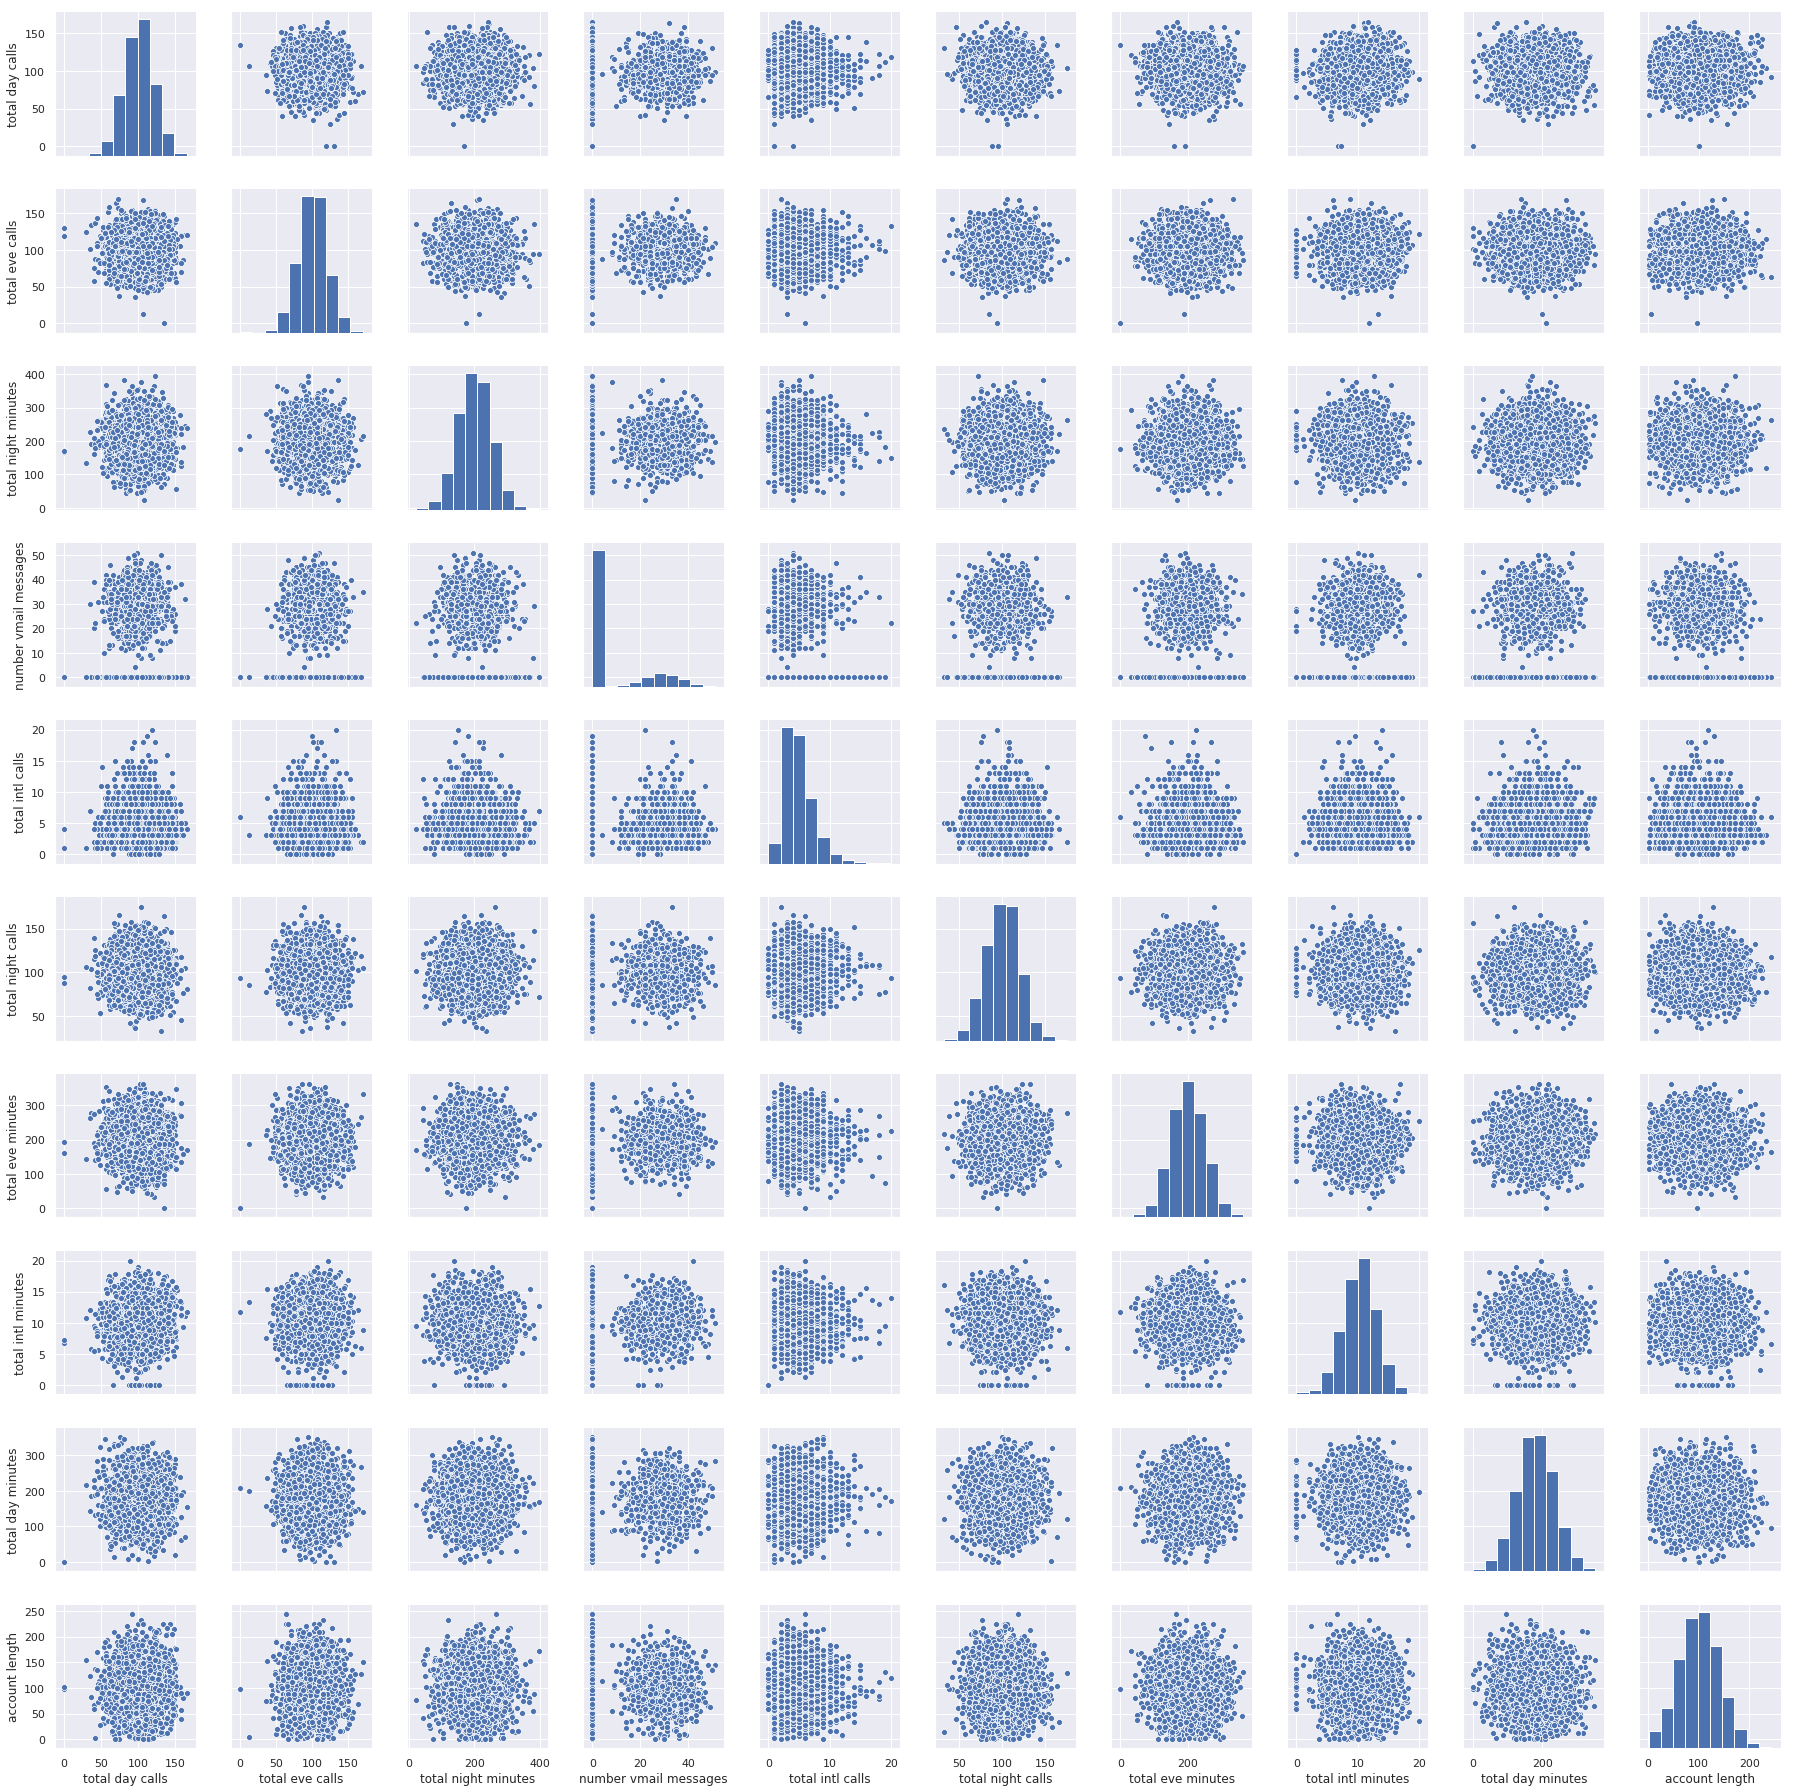

In [13]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])


To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called dimensionality reduction and is an example of an unsupervised learning problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

Now we visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (Churn = False) and those who left (Churn = True).

ValueError: Could not interpret input 'Customer service calls'

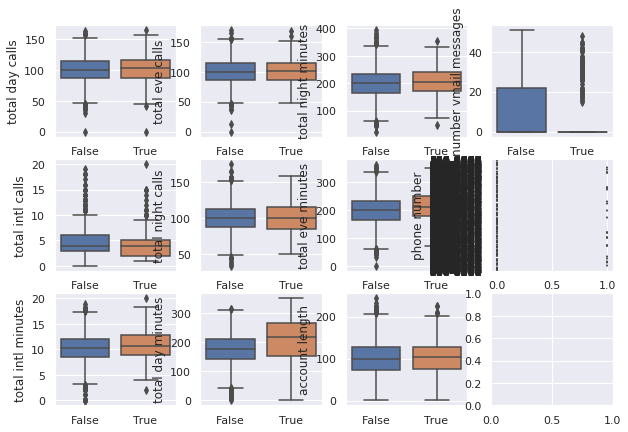

In [17]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();